In [9]:
# Importing the pandas library to work with data in tabular form
import pandas as pd
import numpy as np  # numpy is used for numerical operations
import matplotlib.pyplot as plt  # numpy is used for numerical operations
# Importing linear regression, Lasso regression, and Ridge regression models from scikit-learn
# These are regression algorithms that will be used to model relationships between features and the target variable
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# train_test_split is used to split the dataset into training and testing sets for model evaluation
# GridSearchCV helps in performing hyperparameter tuning to find the best model parameters
from sklearn.model_selection import train_test_split,GridSearchCV
# seaborn is used for statistical data visualization; it provides a high-level interface for drawing attractive graphs
import seaborn as sns
# Importing metrics like R-squared, mean absolute error (MAE), and mean squared error (MSE) for evaluating model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Importing the RandomForestRegressor model for making predictions using a random forest ensemble method
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Reading the dataset 'kc_house_data.csv' into a pandas DataFrame
# The 'parse_dates' argument is used to ensure the 'date' column is recognized as a 
data = pd.read_csv('kc_house_data.csv',parse_dates=['date'])
# Setting the pandas option to display all columns when viewing the DataFrame
pd.set_option('display.max_columns', None)
# Displaying the first 5 rows of the dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
data.info()  # To get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [15]:
data.isna().sum()   #checks for missing values (NaN) in each column and sums them up.

#theres no null value in this 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
data.describe()  #generates descriptive statistics for numerical columns in the dataset.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


- count = the columns have 21,613 entries, meaning there are no missing values in the dataset
- mean = The average price of houses is around 540,088 dollars
- std =  the price has a high standard deviation of around 367,127,dollars indicating significant variability in house prices.
- min max =  The minimum is 0, and the maximum is 33, which is an outlier (33 bedrooms is unrealistic for a typical house).
- percentile = 25% of houses cost less than 321,950 dollar, and 75% cost less than 645,000 dollar The median price is 450,000 dollar

In [17]:
data.isna().sum()  # Check for missing values in the dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
len(data.columns)  # Check the total number of columns in the dataset

21

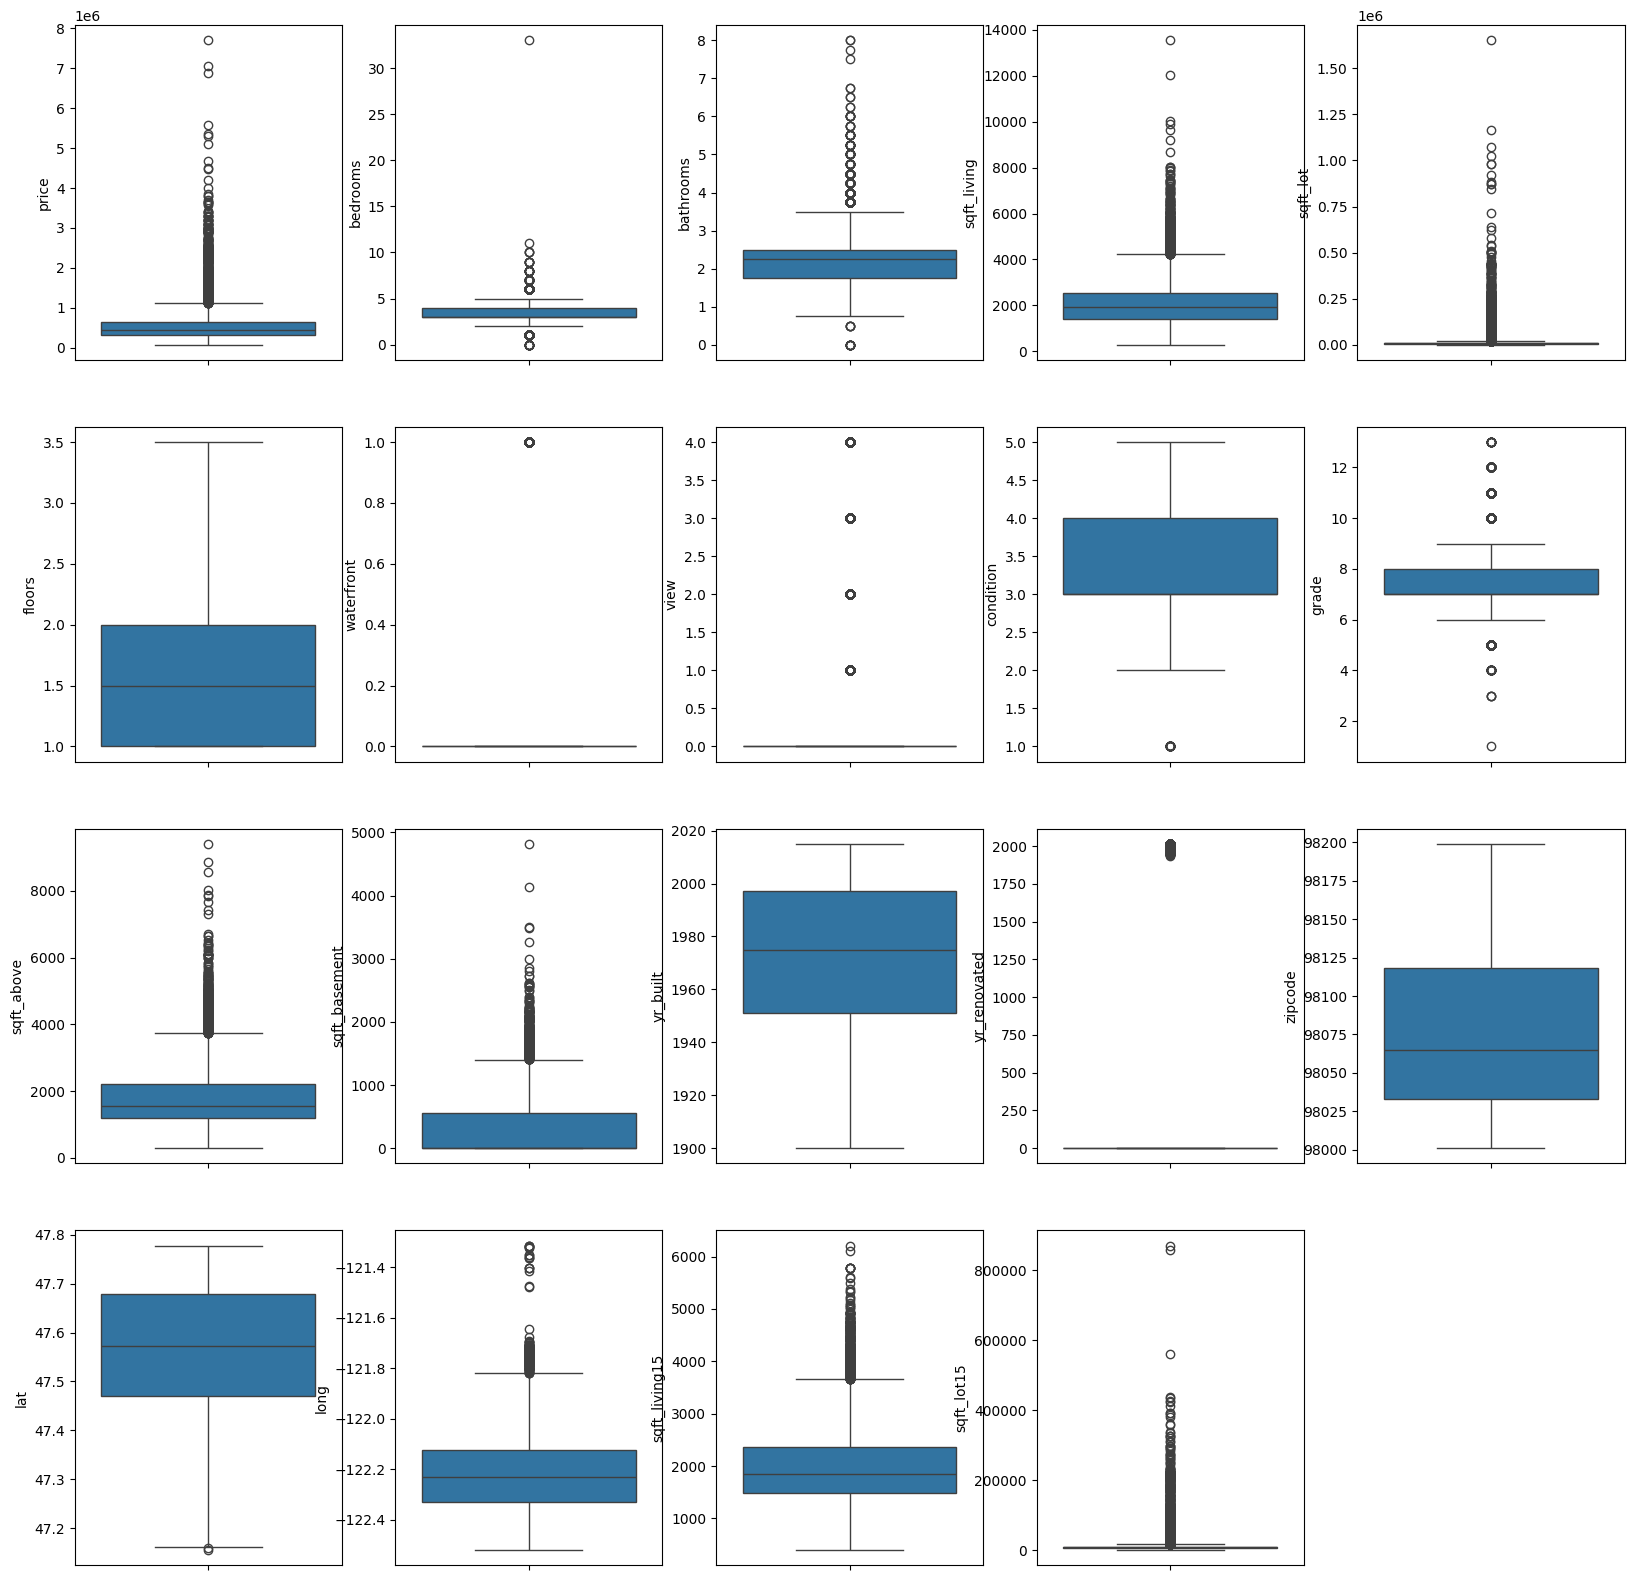

In [19]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

data_describe = data.drop(columns = ['id', 'date'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in data_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(data_describe[column])
    x+=1
plt.tight_layout
plt.show()

# from this box plot below we can see there are outliers in many of the columns and scaling will be useful to handle all the outliers 
# 

In [20]:
### Checking the value that's unsual 
# bedroom and bathroom that's 0 

data[data['bedrooms'] < 1]

# there are rows that does not have bedrooms, which is kind of weird for a house
# i will treat this like a null value and fill it with median numbers of bedroom in a house 
# same goes to the bathrooms with 0 values as well 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [21]:
# Replace rows where bedrooms are 0 with the median number of bedrooms                                                                               
data['bedrooms'] = data['bedrooms'].replace(0, data['bedrooms'].median())
# Replace rows where bathrooms are 0 with the median number of bathrooms
data['bathrooms'] = data['bathrooms'].replace(0, data['bathrooms'].median())

In [22]:
data[data['bedrooms'] < 1]

data.to_csv('data_cleaned.csv')

In [23]:
data[data['bathrooms'] == 0]

# now both of the bedrooms and bathrooms has no null value 
# the value was replaced with median not mean because there's outliers in both columns
# there are some float values in the number of the bathrooms, and according to this
# it's normal not to have a full bathroom size
# - source :
#  https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<Axes: >

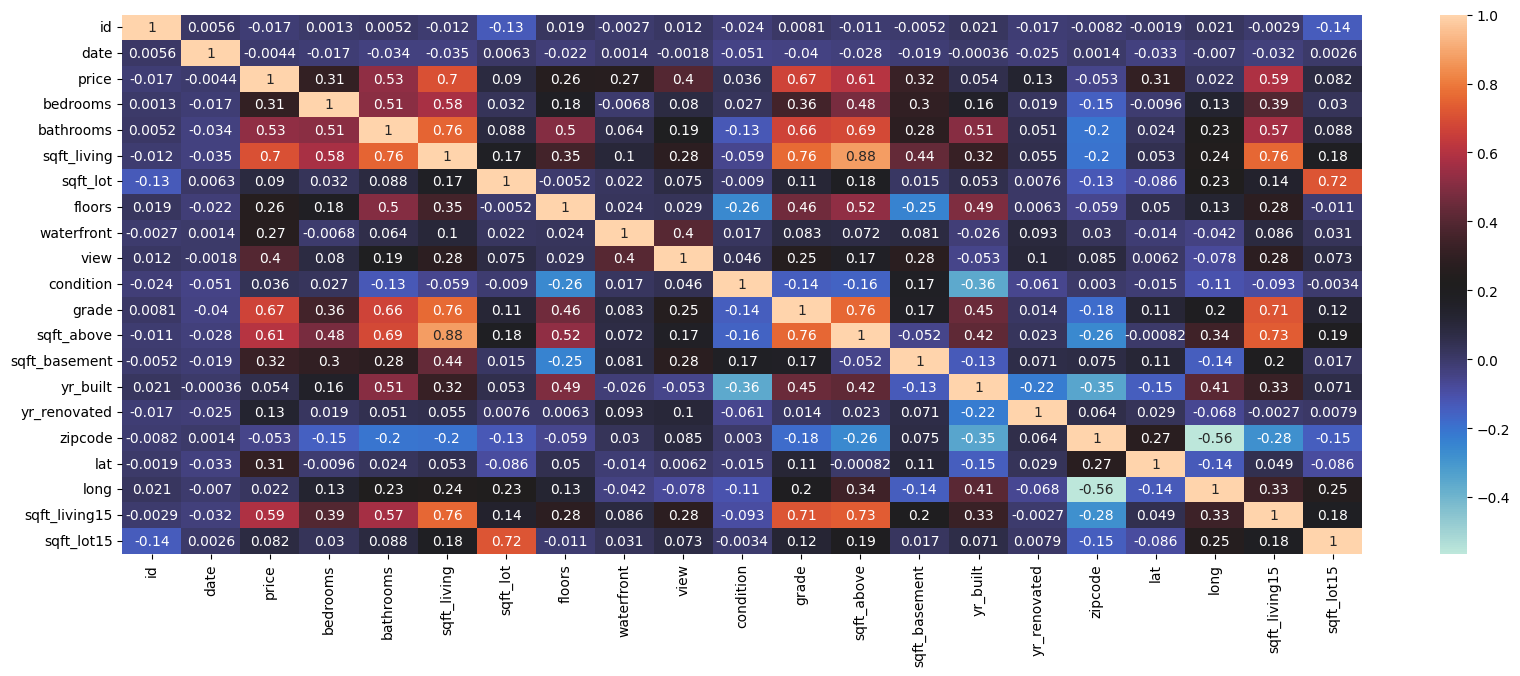

In [24]:
# Creating a heatmap to visualize correlations between features
plt.figure(figsize = (20, 7) )

# Plot a heatmap of the correlation matrix with annotations
sns.heatmap(data.corr(), annot = True, cmap = 'icefire')

# so majority of  columns  has positve correlation with price columns except zipcode 
# correlation column to price correlation ordered by desc:
#     - sqft_living

A heatmap provides a visual representation of the correlation between the dataset’s features. It helps us understand the relationships and dependencies among the features.
This can guide us to identify which features are strongly or weakly related to the target variable (price), which is crucial for model selection and feature importance analysis.
-  heatmap where the color intensities show the strength of correlation between columns.
- **Positive Correlation**: Most columns show a positive correlation with the `price` column, meaning as the values in these columns increase, so does the price.
- **Negative Correlation**: for example Zipcode, shows a negative correlation, meaning it doesn't strongly affect the price.
- **Correlation with Price**: The most positively correlated feature with price is `sqft_living` (living area square footage), suggesting that larger homes generally have higher prices.

In [25]:
# Calculate the correlation matrix for the dataset 
correlation = data.corr()
# Sort the correlation values of the 'price' column in descending order, excluding the first entry (which is 'price' itself)
# This allows us to see the features that are most positively and negatively correlated with the price.
correlation['price'].sort_values(ascending = False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [26]:
# Drop the columns 'id', 'price', and 'date' from the dataset.
# These columns are typically not useful for training a predictive model
X =data.drop(columns = ['id','price','date'])
# Transform the 'price' column using the natural logarithm.
y = np.log(data['price'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = .2, random_state = 42)

# train test split before the test 

To train the dataset, we have chosen Linear Regression, Random Forest, and Ridge Regression for the following reasons:

- Linear Regression: Linear regression is selected for its simplicity and interpretability, allowing us to understand how individual features impact house prices. It serves as a solid baseline model for performance comparison against more complex methods.
Random Forest:

- Random Forest : is chosen for its ability to handle non-linear relationships and interactions between features, making it ideal for complex real estate data. Its ensemble nature reduces the risk of overfitting, providing robust predictions on unseen data.

- Ridge Regression: Ridge regression is employed to address multicollinearity issues by applying regularization, which stabilizes coefficient estimates and improves model generalization. This is particularly beneficial when dealing with correlated features in the house price dataset.

In [28]:
#create an instance of the LinearRegression model
linreg = LinearRegression()

In [44]:
# Fit the Linear Regression model to the training data.
linreg.fit(X_train, y_train)
 

LinearRegression()

In [45]:
# retrieve the names of the columns (feature names) in the dataset
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

This helps us understand which features are being used to predict house prices.
Knowing the features is essential for assessing the data quality and making informed decisions in the model training process.

In [46]:
# Retrieve the coefficients of the features in the Linear Regression model after fitting
linreg.coef_

array([-1.14093201e-02,  7.34842500e-02,  9.67608349e-05,  3.97250129e-07,
        7.49285121e-02,  3.74443055e-01,  6.19963857e-02,  6.10387404e-02,
        1.56644286e-01,  4.09769958e-05,  5.57838385e-05, -3.50796046e-03,
        3.56857639e-05, -6.22468370e-04,  1.40163016e+00, -1.35945262e-01,
        9.80299358e-05, -1.84270709e-07])

This array represents the learned weights for each feature, indicating their influence on the predicted target variable (log-transformed house price)

In [47]:
 #Use the trained Linear Regression model to make predictions on the test dataset (X_test).
y_pred =  linreg.predict(X_test)

In [48]:
# Calculate the R^2 score for the Linear Regression model on the training dataset (X_train, y_train).
linreg_train = linreg.score(X_train, y_train)
linreg_train

0.7701612650855368

The output value 0.770161265085537 indicates the R² score for the Linear Regression model on the training dataset.

In [49]:
# Calculate the R^2 score for the Linear Regression model on the test dataset (X_test, y_test).
linreg.score(X_test, y_test)

0.7710344819282876

The output value 0.7710344819282772 represents the R² score for the Linear Regression model on the test dataset.

In [50]:
# Calculate the R^2 score for the Linear Regression model on the test dataset
r2_linreg = linreg.score(X_test, y_test)
# Calculate the Mean Absolute Error (MAE) to evaluate the average absolute differences between actual and predicted values
MAE_linreg = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) to evaluate the average squared differences between actual and predicted values
MSE_linreg = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE) as the square root of MSE.
RMSE_linreg = np.sqrt(MSE_linreg)

In [51]:
print('Hasil Evaluation Matrix LinReg : ')
print("")
print(f'MAE: {MAE_linreg}')
print(f'MSE:{MSE_linreg}')
print(f"RMSE : {RMSE_linreg}")
print(f"R2 : {r2_linreg}")

Hasil Evaluation Matrix LinReg : 

MAE: 0.19642970996387918
MSE:0.06526250812737609
RMSE : 0.25546527773334693
R2 : 0.7710344819282876


- MAE: 0.19642970996389864:
This value indicates that, on average, the predictions of log-transformed house prices deviate from the actual values by approximately 0.196. This low MAE suggests that the model has reasonably accurate predictions.

- MSE: 0.06526250812737908:
The MSE value indicates that the average squared difference between the actual and predicted values is about 0.065. A lower MSE reflects better model performance, with the MSE highlighting that larger errors are penalized more heavily.

- RMSE: 0.2554652777333528:
The RMSE value shows that the model’s predictions deviate from the actual log-transformed prices by approximately 0.255 on average. Since this metric is in the same units as the target variable, it provides an intuitive measure of prediction accuracy.

- R²: 0.7710344819282772:
This score indicates that the model explains about 77% of the variance in the log-transformed house prices. A value close to 1 indicates a strong relationship between the features and the target variable, confirming the model's effectiveness.

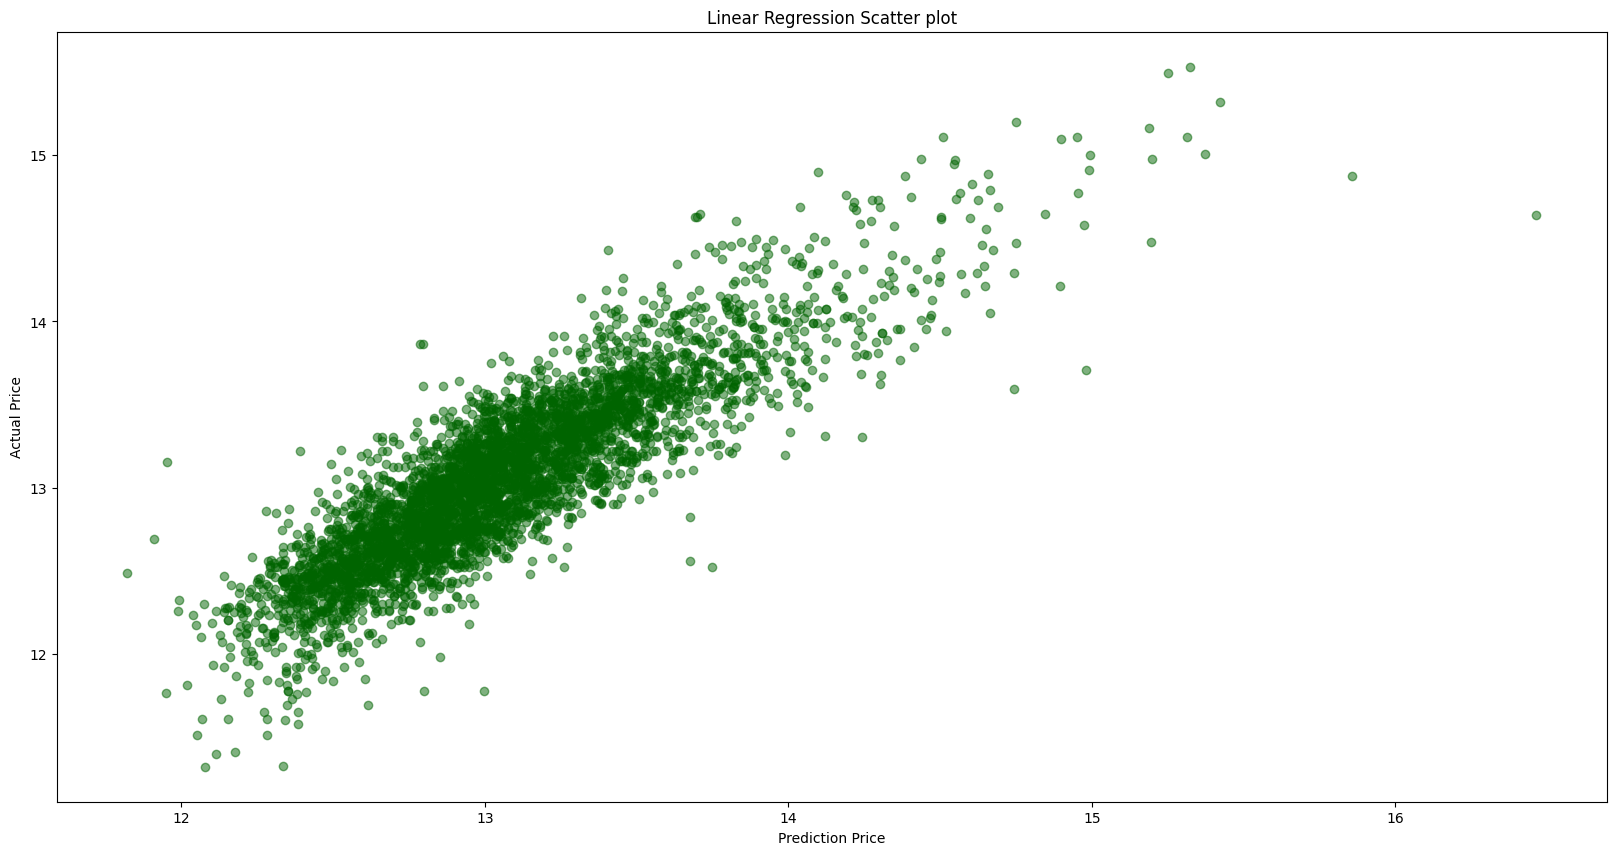

In [52]:
# Create a figure for the scatter plot
plt.figure(figsize = (20, 10 ))
# Plot a scatter plot comparing predicted prices (y_pred) to actual prices (y_test)
plt.scatter(y_pred, y_test, color= 'darkgreen', alpha = 0.5)
# Label the x-axis and y-axis
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
# Set the title of the scatter plot
plt.title('Linear Regression Scatter plot')

# Display the plot.
plt.show()

So, when we look at the scatter plot of the predictions from our linear regression model, we see a few important things:

- Cluster Around the Diagonal: If our model was perfect, all the points would sit perfectly on a diagonal line where the predicted values match the actual values. In our case, we see that most points are pretty close to this line. This tells us that the model is generally doing a good job at predicting house prices. However, there are some points that are farther away, showing that there are some errors in the predictions.

- Tighter Clustering at the Center: If we look closely, we notice that there’s a group of points clustered more densely around the middle range of prices. This suggests that the model works better for houses that fall within this average price range. But it might not perform as well for houses with very high or very low prices, which are the outliers.

# random forest

In [53]:
# Create an instance of the RandomForestRegressor
RF = RandomForestRegressor()

In [54]:
# Fit the model to the training data (X_train, y_train)
RF.fit(X_train, y_train)

RandomForestRegressor()

Output signifies:
 The output displayed after fitting the model shows the configuration of the RandomForestRegressor.
- n_estimators: The number of decision trees in the forest (10 in this case). More trees can improve accuracy but increase computation time.
- criterion: The function used to measure the quality of a split (here, 'mse' for Mean Squared Error).
- max_features: The number of features to consider when looking for the best split (set to 'auto' by default).
- min_samples_split: The minimum number of samples required to split an internal node (2 in this case).

In [55]:
# Use the trained Random Forest Regressor model to make predictions on the test data
# X_test: The input features (independent variables) for which we want to predict the house prices
y_base_RF = RF.predict(X_test)

In [56]:
# Calculate the R-squared score of the Random Forest model on the training data
RF_train =  RF.score(X_train,y_train)

In [57]:
# Calculate R-squared score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error
r2_RF = r2_score(y_test, y_base_RF) # R² score measures how well the model's predictions explain the variance in the actual values.
MAE_RF = mean_absolute_error(y_test, y_base_RF)  # MAE calculates the average absolute difference between predicted and actual values.
MSE_RF = mean_squared_error(y_test, y_base_RF)  # MSE calculates the average squared difference between predicted and actual values.
RMSE_RF = np.sqrt(MSE_RF) # RMSE is the square root of MSE, providing error in the same unit as the target variable.

In [58]:
print('Hasil Evaluation Matrix Random Forest : ')
print("")
print(f'MAE: {MAE_RF}')
print(f'MSE:{MSE_RF}')
print(f"RMSE : {RMSE_RF}")
print(f"R2 : {r2_RF}")

Hasil Evaluation Matrix Random Forest : 

MAE: 0.12655770124885005
MSE:0.03187851938093435
RMSE : 0.1785455666795856
R2 : 0.8881581184227738


These metrics help us assess the performance of the Random Forest model on the test data (y_test and y_base_RF).
 - **R² Score (r2_RF)**: Indicates how well the model explains the variability of the target variable. A higher value (closer to 1) is better.
 - **Mean Absolute Error (MAE)**: Gives a clear idea of how far off the predictions are from the actual values, on average.
 - **Mean Squared Error (MSE)**: Penalizes larger errors more than smaller ones, useful for understanding the overall error distribution.
 - **Root Mean Squared Error (RMSE)**: Represents the average error in the same units as the target variable, making it easier to interpret.


By analyzing these evaluation metrics, we can gauge how well our Random Forest model is performing.
- A low MAE, MSE, and RMSE indicate better prediction accuracy, while a higher R² score signifies that the model effectively captures the relationship in the data.


# ridge regression

In [59]:
# Create an instance of the Ridge regression model with a specified regularization strength (alpha)
ridge = Ridge(alpha = 1)

In [60]:
# Fit the Ridge regression model to the training data
ridge.fit(X_train, y_train)

Ridge(alpha=1)

The output confirms that the Ridge regression model has been successfully fitted to the training data.
- `alpha`: This is the regularization strength that we set earlier. 
- Other parameters such as `copy_X`, `fit_intercept`, etc., indicate default settings for the model's behavior.

Conclusion from the output:
- By fitting the model, we are now ready to make predictions on new data using the trained Ridge regression model.
- After fitting, we can evaluate the model’s performance on the test set and compare it with other models.
- It's important to check metrics like R-squared, MAE, and RMSE after making predictions to assess how well the model generalizes to unseen data.

In [61]:
# Use the trained Ridge regression model to make predictions on the test data
y_ridge_prediction = ridge.predict(X_test)
y_ridge_prediction

array([12.97269555, 13.47764967, 14.05323332, ..., 12.74967064,
       13.1584047 , 12.75842854])

In [62]:
# Calculate the R-squared score (coefficient of determination) of the Ridge model on the training data
ridge_train =  ridge.score(X_train, y_train)
ridge_train

0.7701594822136455

- The R² score is a measure of how well the model explains the variability of the target variable (y_train) based on the input features (X_train).
- The output (0.7701) means that approximately 77% of the variance in the training data is explained by the Ridge regression model.

In [63]:
# Calculate performance metrics for the Ridge regression model on the test data
r2_ridge = ridge.score(X_test, y_test)    # Calculates the R² score to measure the goodness of fit for the test data
MAE_ridge = mean_absolute_error(y_test, y_ridge_prediction)   # Computes the Mean Absolute Error (MAE)
MSE_ridge = mean_squared_error(y_test, y_ridge_prediction)    # Computes the Mean Squared Error (MSE)
RMSE_ridge = np.sqrt(MSE_ridge)  # Computes the Root Mean Squared Error (RMSE), which is the square root of the MSE

In [64]:
print('Hasil Evaluation Matrix Ridge : ')
print("")
print(f'MAE: {MAE_ridge}')
print(f'MSE:{MSE_ridge}')
print(f"RMSE : {RMSE_ridge}")
print(f"R2 : {r2_ridge}")

Hasil Evaluation Matrix Ridge : 

MAE: 0.19642466799619995
MSE:0.06526289053227835
RMSE : 0.25546602618015246
R2 : 0.7710331403075152


Output significance:
- MAE: 0.1964 means the average prediction error is approximately 0.196 (in the same units as the target variable)
- MSE: 0.0652 indicates the average squared error between the predicted and actual values
- RMSE: 0.2555 means that on average, the predictions are off by around 0.255 units from the actual values
- R²: 0.7710 indicates that the model explains about 77% of the variance in the test data, which shows a good fit but not perfect.

Conclusion from the output:
- These metrics suggest that the Ridge regression model performs fairly well on the test data.
- It has a low prediction error, and the R² score indicates that the model captures most of the variance in the target variable.
- However, there may still be room for improvement, especially in handling more extreme values or outliers.

Random Forest Hyper Parameter Tuning

- Random Forest has the highest R² score (0.889), which means it explains around 88.9% of the variance in our target variable. 
- It has lower MAE (0.125) and RMSE (0.177), indicating that it makes fewer prediction errors compared to Linear and Ridge Regression.
-  Random Forest is less likely to overfit because it uses multiple decision trees and averages their predictions, reducing variance and improving accuracy.
-  To improve your Random Forest model, we can perform hyperparameter tuning using techniques like Grid Search or Randomized Search. This involves adjusting parameters like the number of trees (n_estimators), the depth of the trees (max_depth), and others to find the best configuration for the model.

We’ll use RandomizedSearchCV, which is faster than GridSearchCV because it tests a random combination of parameters instead of every possible combination.

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [78]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}


In [79]:
# Initialize the model
rf = RandomForestRegressor()

In [80]:
# Randomized Search with cross-validation (5 folds)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [81]:
# Fit the model with randomized search
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:

# Fit the model with randomized search
rf_random.fit(X_train, y_train)


In [ ]:
# Check the best parameters
print(f'Best Parameters: {rf_random.best_params_}')

In [ ]:
# Predict using the tuned model
y_base_RF = rf_random.best_estimator_.predict(X_test)


In [ ]:
print('Evaluation Metrics for Tuned Random Forest:')
print(f'MAE: {MAE_RF}')
print(f'MSE: {MSE_RF}')
print(f'RMSE: {RMSE_RF}')
print(f'R²: {r2_RF}')

In [ ]:
# Visualize the predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_base_RF, y_test, color='blue', alpha=0.6)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Tuned Random Forest Regressor - Predicted vs Actual')
plt.show()

# Conclusion :
- Random Forest with HyperParameter Tuning has the Higest evaluation matrix to predict house prices in King County with the accuracy of 89 %

# Alternative Approach:

My approach would be to create an HTML page where each house is marked on the map, with the price displayed directly on the markers. When a user clicks on a marker, a popup would appear providing more detailed information such as the house's features (e.g., number of bedrooms, square footage) and its condition (e.g., newly renovated, fixer-upper). This would allow users to easily explore and interact with property data in a visually intuitive way, similar to the image shown above.